From https://www.analyticsvidhya.com/blog/2019/04/introduction-image-segmentation-techniques-python/?utm_source=blog&utm_medium=computer-vision-implementing-mask-r-cnn-image-segmentation#2

## Threshold Segmentation

Most basic form of segmentation: threshold segmentation

If we have two classes, we define a single *global threshold*.
If we have multiple classes, we define several *local thresholds*.

In [1]:
# Import packages
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

(192, 263, 3)


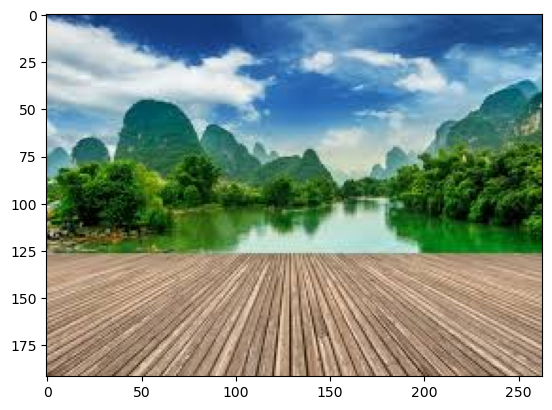

In [2]:
# Read and display image
image = plt.imread('1.jpeg')
plt.imshow(image);
print(image.shape)

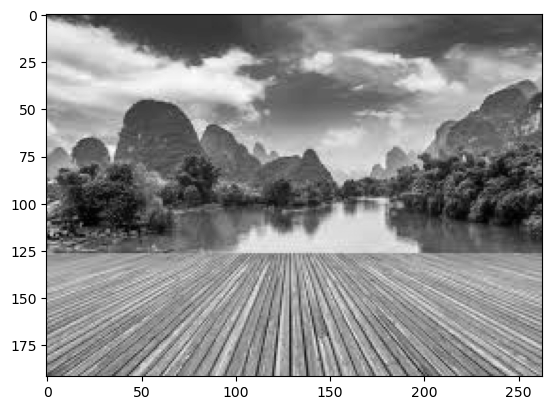

In [3]:
# Convert to grayscale to illustrate thresholding
gray = rgb2gray(image)
# cv2.imshow('img',gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(gray, cmap = "gray");

In [4]:
# Show shape
gray.shape

(192, 263)

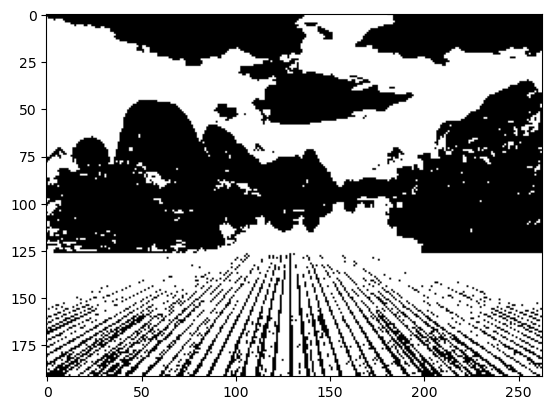

In [5]:
# Threshold using mean value
    # no need for a loop...
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

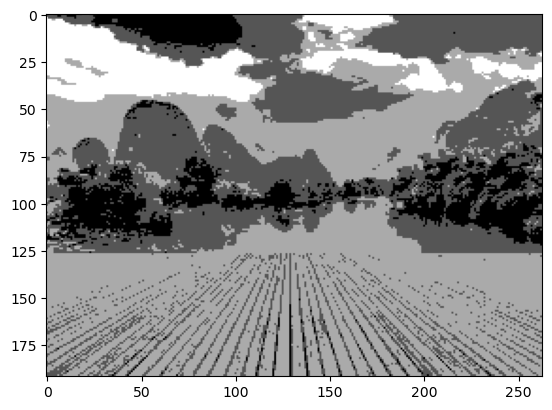

In [6]:
# Threshold with several values
    # no need for a loop...
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

Advantages:
- Easy to implement
- Runs fast
- Works well if contrast is high

Limitations:
- Only uses grayscale
- Performs bad if low grayscale contrast or grayscale value overlap

## Edge detection segmentation

First convolve the image with a kernel that detects edges.
Then threshold (presumably).

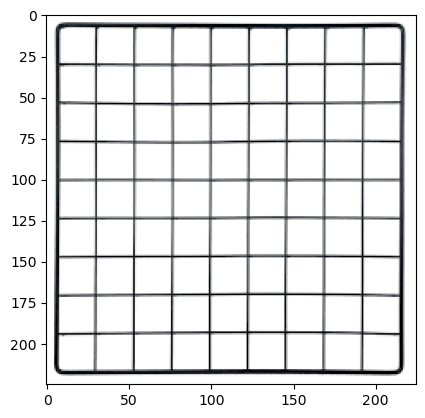

In [7]:
# Read and display image
image = plt.imread('index.png')
plt.imshow(image);

In [8]:
# Convert to grayscale
gray = rgb2gray(image[:,:,:3])

# Defining the sobel filters (specific kernels for extracting edges)
sobel_horizontal = np.array([[1, 2, 1],[0, 0, 0],[-1, -2, -1]])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


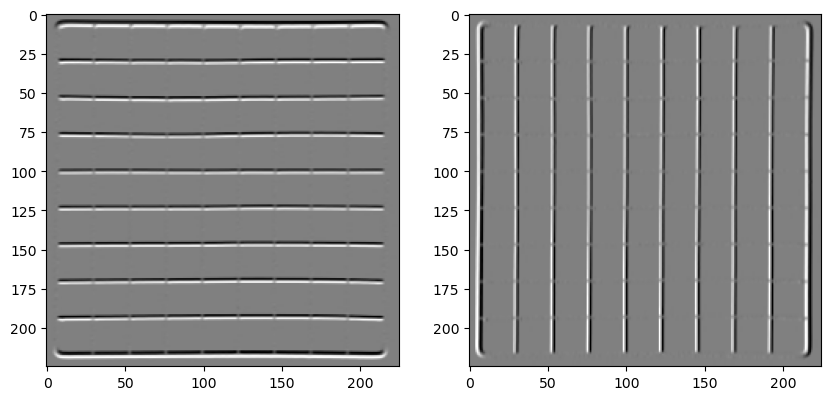

In [9]:
# Convolve
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

# Show results
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(out_h, cmap='gray')
ax[1].imshow(out_v, cmap='gray');

In [10]:
# The laplacer operator/kernel can detect both horizontal and vertical edges
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


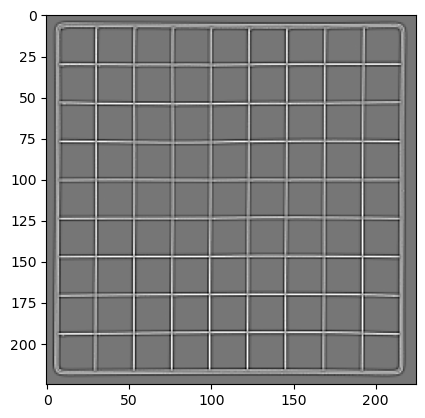

In [11]:
# Convolve, show results
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray');

## Clustering segmentation

Let's try segmentation with k-means clustering

(192, 263, 3)


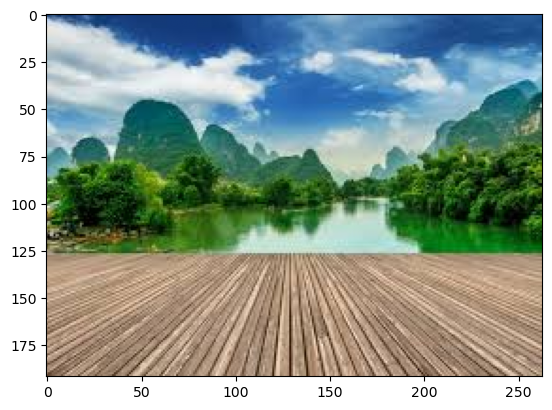

In [12]:
# Read and display
pic = plt.imread('1.jpeg')/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic);

In [13]:
# Reshape to have row for each pixel, column for each channel (we will not be doing anything spatial)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(50496, 3)

In [14]:
# Apply k-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n) 
pic2show = kmeans.cluster_centers_[kmeans.labels_] # returns clusters centers

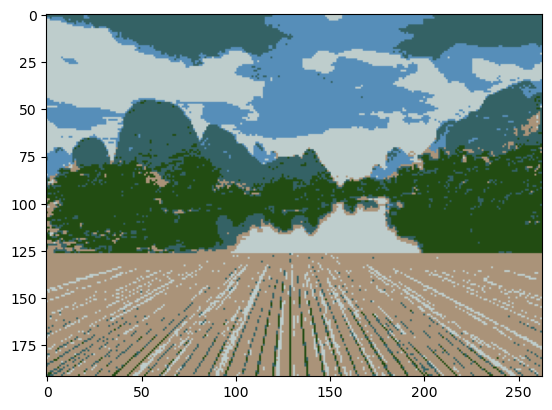

In [15]:
# Display results
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic);

K-means often performs well on small datasets!

But not very well on large numbers of images.

## Mask R-CNN segmentation

This is an extension of the Faster R-CNN method, which identifies the class and a bounding box for each object.
The benefit of Mask R-CNN is that it adds a pixel-wise mask as well.

The first tutorial briefly discusses how this works, but does not include Python code for doing it ourselves.

I think the implementation is included in the next tutorial! https://www.analyticsvidhya.com/blog/2019/07/computer-vision-implementing-mask-r-cnn-image-segmentation/

Let's work through the second tutorial now.

Includes a helpful graphic for distinguishing between Faster R-CNN and Mask R-CNN.

Briefly explains how Faster R-CNN works (I didn't understand this).

Explains more in-depth how Mask R-CNN works (I also didn't understand this).

Training time for CNNs is quite high. It took the author of the tutorial 1-2 days to train their model. Hence we use a pre-trained model below.

In [16]:
# Clone repository with the architecture for RCNN
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 16.08 MiB/s, done.
Resolving deltas: 100% (558/558), done.


In [17]:
# Install required packages
!pip install cython tensorflow keras opencv-python h5py imgaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.9 MB/s eta 0:00:0000:0100:01


Download pre-trained weights: https://github.com/matterport/Mask_RCNN/releases

I went with the 2.0 version, downloading just mask_rcnn_coco.h5.

Then place the download in the samples folder of the cloned GitHub repo.

Now look in the samples folder for part 2.

Look at level sets and active contours?